**Getting the Library**

In [ ]:
#!pip install imblearn
#!pip install tensorflow

import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()

###Loading the Dataset

In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['final-v1.csv']))
df.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [ ]:
df.head()


,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [ ]:
df.tail()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
780,0.0,0.020,9,0,0,14,1,0,0,0,0,0,0
781,0.0,0.081,18,1,0,15,1,0,0,0,0,0,0
782,0.0,0.115,9,0,0,8,1,0,0,0,0,0,0
783,0.0,0.049,12,0,0,28,1,0,0,0,0,0,0
784,0.0,0.096,11,0,0,0,1,0,0,0,0,0,0


###DATA EXPLORATION

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edge_followed_by,785.0,0.002223,0.036105,0.0,0.000,0.000,0.000,1.0
edge_follow,785.0,0.401606,0.293845,0.0,0.135,0.336,0.623,1.0
username_length,785.0,11.630573,3.284329,5.0,9.000,11.000,13.000,26.0
username_has_number,785.0,0.644586,0.478944,0.0,0.000,1.000,1.000,1.0
full_name_has_number,785.0,0.109554,0.312532,0.0,0.000,0.000,0.000,1.0
full_name_length,785.0,6.129936,6.943903,0.0,0.000,5.000,11.000,30.0
is_private,785.0,0.184713,0.388312,0.0,0.000,0.000,0.000,1.0
is_joined_recently,785.0,0.361783,0.480823,0.0,0.000,0.000,1.000,1.0
has_channel,785.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.0
is_business_account,785.0,0.073885,0.261751,0.0,0.000,0.000,0.000,1.0


In [ ]:
df.shape

(785, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edge_followed_by      785 non-null    float64
 1   edge_follow           785 non-null    float64
 2   username_length       785 non-null    int64  
 3   username_has_number   785 non-null    int64  
 4   full_name_has_number  785 non-null    int64  
 5   full_name_length      785 non-null    int64  
 6   is_private            785 non-null    int64  
 7   is_joined_recently    785 non-null    int64  
 8   has_channel           785 non-null    int64  
 9   is_business_account   785 non-null    int64  
 10  has_guides            785 non-null    int64  
 11  has_external_url      785 non-null    int64  
 12  is_fake               785 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 79.9 KB


In [ ]:
df.nunique()

edge_followed_by         22
edge_follow             506
username_length          21
username_has_number       2
full_name_has_number      2
full_name_length         30
is_private                2
is_joined_recently        2
has_channel               1
is_business_account       2
has_guides                2
has_external_url          2
is_fake                   2
dtype: int64

In [ ]:
df.isnull().sum()

edge_followed_by        0
edge_follow             0
username_length         0
username_has_number     0
full_name_has_number    0
full_name_length        0
is_private              0
is_joined_recently      0
has_channel             0
is_business_account     0
has_guides              0
has_external_url        0
is_fake                 0
dtype: int64

In [ ]:
df['is_fake'].value_counts(normalize = True)

is_fake
1    0.881529
0    0.118471
Name: proportion, dtype: float64

In [ ]:
cormatrix = df.corr()
cormatrix

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
edge_followed_by,1.000000,-0.054259,-0.033704,-0.071313,-0.019349,0.116751,-0.024593,-0.044327,NaN,0.036585,0.002749,0.180392,-0.136808
edge_follow,-0.054259,1.000000,-0.112940,0.160248,0.104735,-0.089677,-0.072626,-0.133170,NaN,-0.132422,0.002723,-0.108482,0.272649
username_length,-0.033704,-0.112940,1.000000,-0.160610,-0.021410,0.277052,0.117582,-0.099414,NaN,0.132683,-0.006861,0.112466,-0.151752
username_has_number,-0.071313,0.160248,-0.160610,1.000000,0.217852,-0.246511,-0.154072,0.127046,NaN,-0.278637,-0.048097,-0.237466,0.370164
full_name_has_number,-0.019349,0.104735,-0.021410,0.217852,1.000000,0.250275,-0.072366,0.066941,NaN,-0.083482,-0.012527,-0.039926,0.128588
full_name_length,0.116751,-0.089677,0.277052,-0.246511,0.250275,1.000000,0.064409,-0.216572,NaN,0.323137,0.122848,0.309318,-0.350433
is_private,-0.024593,-0.072626,0.117582,-0.154072,-0.072366,0.064409,1.000000,-0.071448,NaN,-0.134444,-0.016999,-0.041399,-0.262292
is_joined_recently,-0.044327,-0.133170,-0.099414,0.127046,0.066941,-0.216572,-0.071448,1.000000,NaN,-0.172122,-0.026889,-0.150433,0.276012
has_channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_business_account,0.036585,-0.132422,0.132683,-0.278637,-0.083482,0.323137,-0.134444,-0.172122,NaN,1.000000,0.126443,0.289467,-0.318395


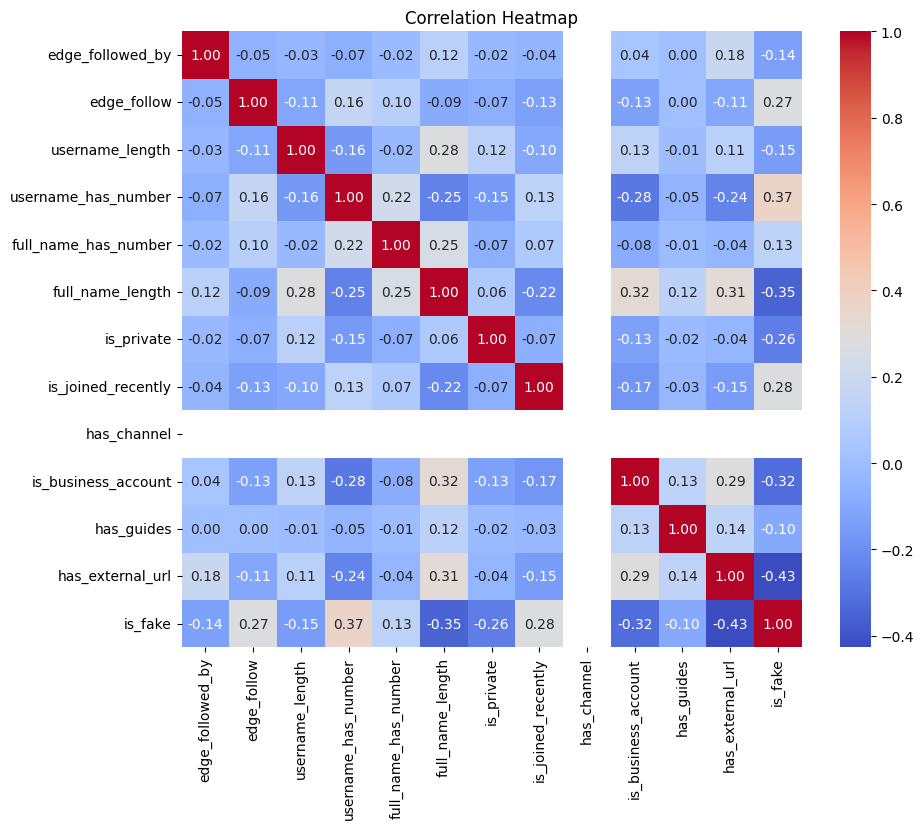

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cormatrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

1. As per the correlation we can see that username_has_number is 37% correalated which can be considered as "is_fake".
2. "is_business_account, "has_external_url" is negatively correlated which is having no impact of being is "is_fake".

In [ ]:
features_list=df.columns
features_list

Index(['edge_followed_by', 'edge_follow', 'username_length',
       'username_has_number', 'full_name_has_number', 'full_name_length',
       'is_private', 'is_joined_recently', 'has_channel',
       'is_business_account', 'has_guides', 'has_external_url', 'is_fake'],
      dtype='object')

**Train and Test data split**

In [ ]:
y = df['is_fake']
x = df.drop(columns = 'is_fake',axis = 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

**STANDARDIZATION**


In [ ]:
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [ ]:
x_train.shape,x_test.shape

((628, 12), (157, 12))

**LOGISITC REGRSSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
Log_Mod = LogisticRegression()
Log_Mod.fit(x_train, y_train)
y_predLR = Log_Mod.predict(x_test)
print("Accuracy on training set: {:.3f}".format(Log_Mod.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(Log_Mod.score(x_test, y_test)))
print("Logistic Regression:")
print(classification_report(y_predLR, y_test))
#Fake = 1, and Not Fake = 0

Accuracy on training set: 0.938
Accuracy on test set: 0.930
Logistic Regression:
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        14
           1       0.98      0.94      0.96       143

    accuracy                           0.93       157
   macro avg       0.78      0.86      0.81       157
weighted avg       0.94      0.93      0.93       157



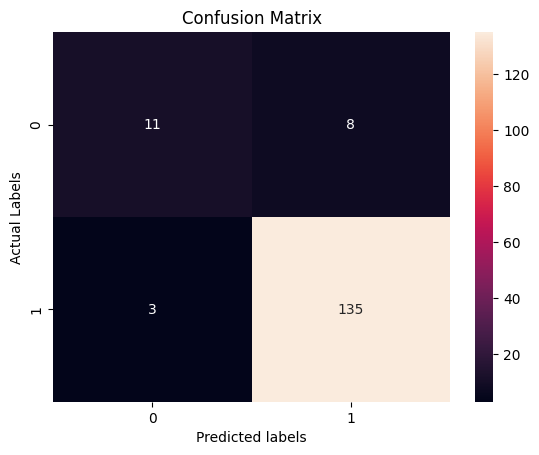

Accuracy = 0.9299363057324841
Precision = 0.9440559440559441
Recall = 0.9782608695652174
F1 Score = 0.9608540925266904


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score
def disp_confusion_matrix(model, x, y):
    ypred = model.predict(x)
    cm = confusion_matrix(y,ypred)
    ax = sns.heatmap(cm,annot=True,fmt='d')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Actual Labels')
    ax.set_title('Confusion Matrix')
    plt.show()

    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    print('Accuracy =',accuracy)
    print('Precision =',precision)
    print('Recall =',recall)
    print('F1 Score =',f1)
    return accuracy,precision,recall,f1

accuracy_lr_test,precision_lr_test,recall_lr_test,f1_lr_test = disp_confusion_matrix(Log_Mod,x_test, y_test)



ROC AUC = 0.9431731502669718


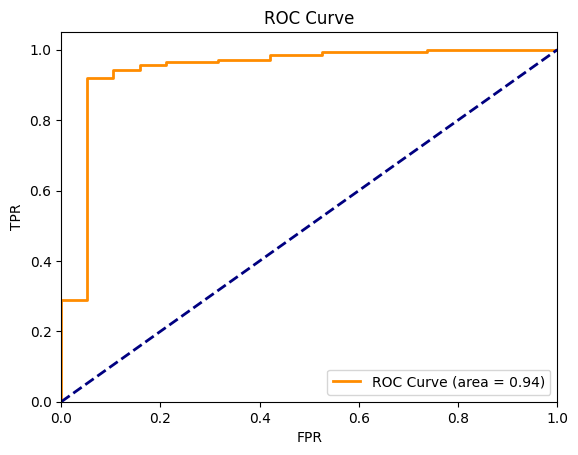

In [ ]:
def disp_roc_curve(model, xtest, ytest):
    yprob = model.predict_proba(xtest)
    fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
    roc_auc = roc_auc_score(ytest,yprob[:,1])

    print('ROC AUC =', roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

disp_roc_curve(Log_Mod, x_test, y_test)

**SMOTE Oversampling**

**Objective:** Evaluate the performance of Logistic Regression with SMOTE oversampling.
Using SMOTE (Synthetic Minority Over-Sampling Technique) to handle class imbalance.
*   Resampling the data and preparing it for model training. SMOTE oversampling was performed on X_resampled and y_resampled.
*   Initializing logistic Regression classifier(clf) and fitting the classifier on the SMOTE- resampled training data(X_resampled, y_resampled)









In [ ]:
from imblearn.over_sampling import SMOTE
ada = SMOTE()
X_resampled, y_resampled = ada.fit_resample(x_train, y_train)
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
X_resampled.shape, y_resampled.shape

((1108, 12), (1108,))

x_test and y_test were not included in the model training process to avoid the data leakage.
*   Accuary on training set = 0.88
*   Accuarcy on test set = 0.911






In [ ]:
y_predLR = clf.predict(x_test)
print("Accuracy on training set: {:.3f}".format(clf.score(X_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))
print("Logistic Regression:")
print(classification_report(y_predLR, y_test))

Accuracy on training set: 0.931
Accuracy on test set: 0.898
Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.55      0.69        33
           1       0.89      0.99      0.94       124

    accuracy                           0.90       157
   macro avg       0.92      0.77      0.82       157
weighted avg       0.90      0.90      0.89       157



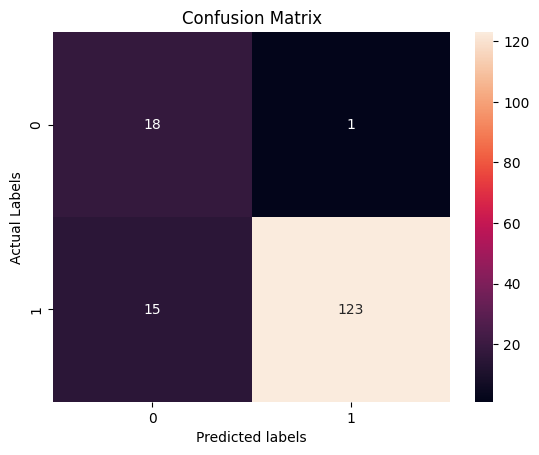

Accuracy = 0.8980891719745223
Precision = 0.9919354838709677
Recall = 0.8913043478260869
F1 Score = 0.9389312977099237


In [ ]:
accuracy_smote_test,precision_smote_test,recall_smote_test,f1_smote_test=disp_confusion_matrix(clf,x_test, y_test)

ROC AUC = 0.9477498093058734


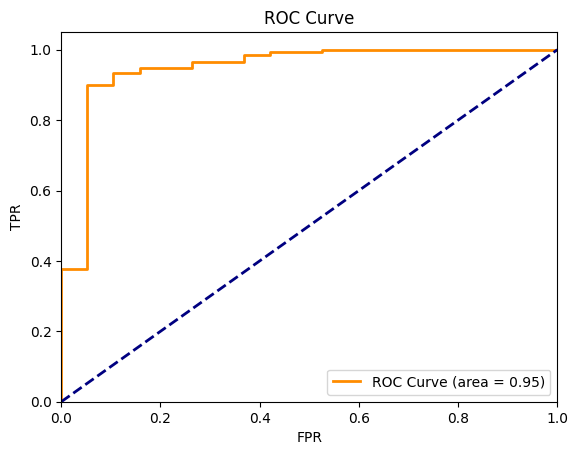

In [ ]:
disp_roc_curve(clf, x_test, y_test)

**RANDOM FOREST CLASSIFIER**


Random Forest:
              precision    recall  f1-score   support

           0       0.47      0.90      0.62        10
           1       0.99      0.93      0.96       147

    accuracy                           0.93       157
   macro avg       0.73      0.92      0.79       157
weighted avg       0.96      0.93      0.94       157

Accuracy on training set: 1.000
Accuracy on test set: 0.930


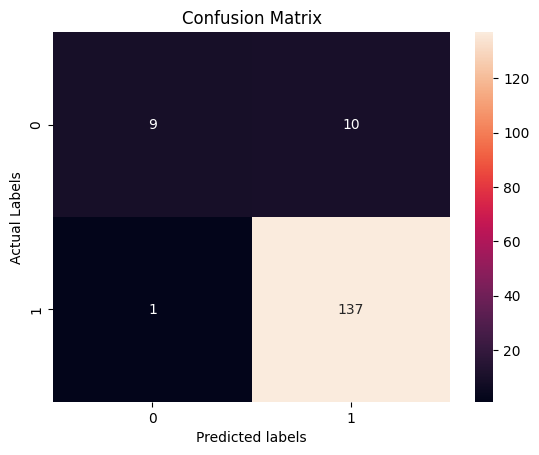

Accuracy = 0.9299363057324841
Precision = 0.9319727891156463
Recall = 0.9927536231884058
F1 Score = 0.9614035087719299


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(classification_report(y_pred_rf, y_test))
print("Accuracy on training set: {:.3f}".format(rf_model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_model.score(x_test, y_test)))

accuracy_rf_test,precision_rf_test,recall_rf_test,f1_rf_test = disp_confusion_matrix(rf_model,x_test, y_test)

Let's try changing some parameters in Random Forest Classifier and see if we can improve our scores:

In [ ]:
parameters = {"max_depth":[3, 5, 7, 9], "criterion":["gini","entropy"],
              "ccp_alpha" : [0.01, 0.05, 0.08, 0.1, 0.2],
             "min_samples_split": [10, 20, 30],
             "n_estimators": [100, 200, 300, 400, 500]}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, cv=3)


In [ ]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.05, 0.08, 0.1, 0.2],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
updated_RF = RandomForestClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9,
                       min_samples_split=10, n_estimators=400)

updated_RF.fit(x_train, y_train)
y_predURF = updated_RF.predict(x_test)
print(classification_report(y_predURF, y_test))
print("Accuracy on training set: {:.3f}".format(updated_RF.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(updated_RF.score(x_test, y_test)))


              precision    recall  f1-score   support

           0       0.37      1.00      0.54         7
           1       1.00      0.92      0.96       150

    accuracy                           0.92       157
   macro avg       0.68      0.96      0.75       157
weighted avg       0.97      0.92      0.94       157

Accuracy on training set: 0.965
Accuracy on test set: 0.924


In [ ]:
from sklearn.tree import export_graphviz
import pydot
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 5)
rf_small.fit(x_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = list(x.columns), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

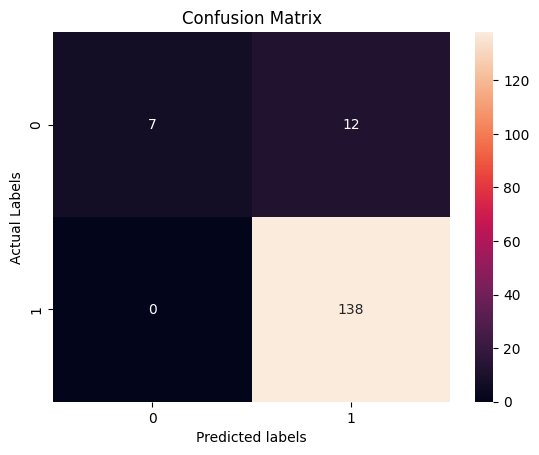

Accuracy = 0.9235668789808917
Precision = 0.92
Recall = 1.0
F1 Score = 0.9583333333333334


In [ ]:
accuracy_urf_test,precision_urf_test,recall_urf_test,f1_urf_test=disp_confusion_matrix(updated_RF,x_test, y_test)

ROC AUC = 0.9633867276887873


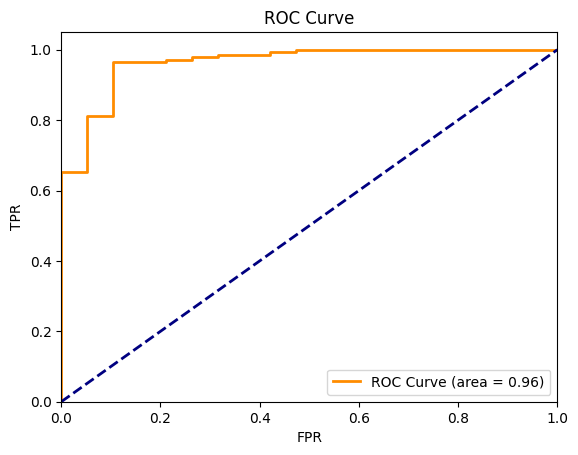

In [ ]:
disp_roc_curve(updated_RF, x_test, y_test)

Also tried using the smote analysis(oversampling) to check if there will be any change in score


In [ ]:
updated_RF.fit(X_resampled, y_resampled)
y_predurf = updated_RF.predict(x_test)
print("Accuracy on training set: {:.3f}".format(updated_RF.score(X_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(updated_RF.score(x_test, y_test)))
print("Oversampling Random Forest:")
print(classification_report(y_predurf, y_test))

Accuracy on training set: 0.960
Accuracy on test set: 0.930
Oversampling Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.93      0.98      0.96       131

    accuracy                           0.93       157
   macro avg       0.91      0.82      0.86       157
weighted avg       0.93      0.93      0.93       157



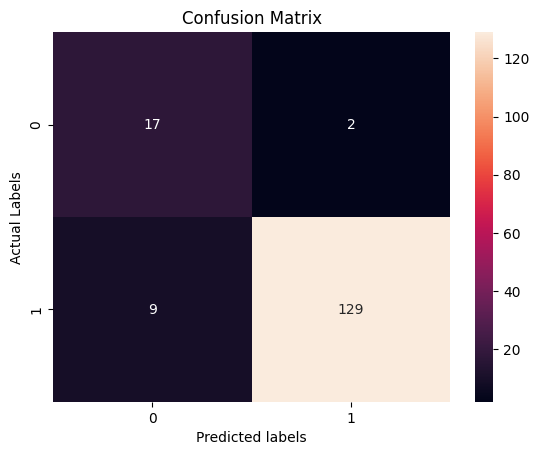

Accuracy = 0.9299363057324841
Precision = 0.9847328244274809
Recall = 0.9347826086956522
F1 Score = 0.9591078066914499


In [ ]:
accuracy_rfsmote_test,precision_rfsmote_test,recall_rfsmote_test,f1_rfsmote_test=disp_confusion_matrix(updated_RF,x_test, y_test)


**XG BOOST**

Trying some advanced boosting methods

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_predXGB = xgbc.predict(x_test)
print(classification_report(y_predXGB, y_test))
print("Train accuracy: ", xgbc.score(x_train,y_train))
print("Test accuracy: ", xgbc.score(x_test,y_test))


              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.99      0.96      0.98       142

    accuracy                           0.96       157
   macro avg       0.86      0.95      0.90       157
weighted avg       0.97      0.96      0.96       157

Train accuracy:  1.0
Test accuracy:  0.9617834394904459


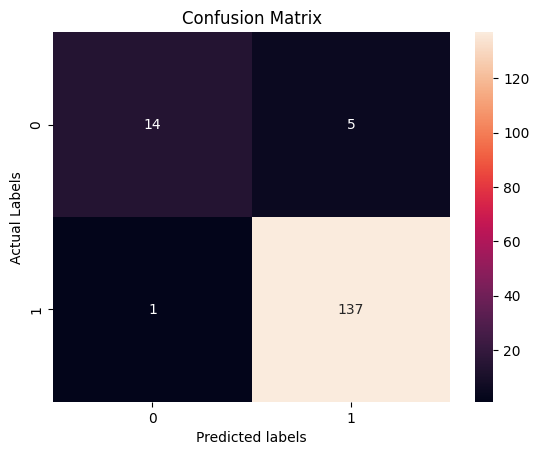

Accuracy = 0.9617834394904459
Precision = 0.9647887323943662
Recall = 0.9927536231884058
F1 Score = 0.9785714285714285


In [ ]:
accuracy_xgbc_test,precision_xgbc_test,recall_xgbc_test,f1_xgbc_test=disp_confusion_matrix(xgbc,x_test, y_test)

## Tuning Parameter

In [ ]:
u_xgbc = XGBClassifier(
    n_estimators=200,
    objective='binary:logistic',
    tree_method='hist',
    eta=0.2,
    max_depth=3,
    enable_categorical=True)

u_xgbc.fit(x_train,y_train)
y_predUXGB = u_xgbc.predict(x_test)
print(classification_report(y_predUXGB, y_test))

print("Train accuracy: ", u_xgbc.score(x_train,y_train))
print("Test accuracy: ", u_xgbc.score(x_test,y_test))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       1.00      0.95      0.98       145

    accuracy                           0.96       157
   macro avg       0.82      0.98      0.87       157
weighted avg       0.97      0.96      0.96       157

Train accuracy:  1.0
Test accuracy:  0.9554140127388535


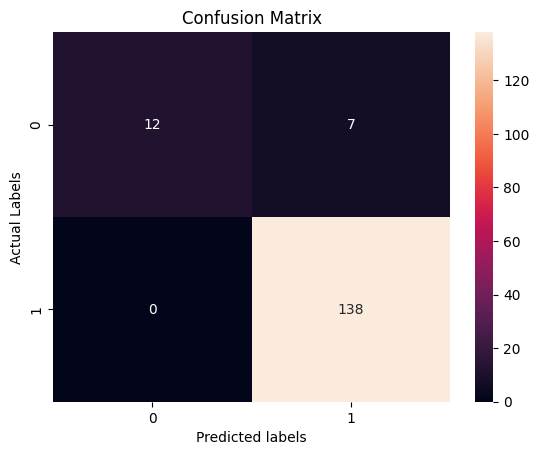

Accuracy = 0.9554140127388535
Precision = 0.9517241379310345
Recall = 1.0
F1 Score = 0.9752650176678445


In [ ]:
accuracy_uxgbc_test,precision_uxgbc_test,recall_uxgbc_test,f1_uxgbc_test=disp_confusion_matrix(u_xgbc,x_test, y_test)

## Oversampling with XGBoost

In [ ]:
o_xgbc = XGBClassifier()
o_xgbc.fit(X_resampled, y_resampled)
y_predOXGB = o_xgbc.predict(x_test)
print("Accuracy on training set: {:.3f}".format(o_xgbc.score(X_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(o_xgbc.score(x_test, y_test)))
print("Oversampling XGBoost:")
print(classification_report(y_predOXGB, y_test))

Accuracy on training set: 1.000
Accuracy on test set: 0.949
Oversampling XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.97      0.97      0.97       138

    accuracy                           0.95       157
   macro avg       0.88      0.88      0.88       157
weighted avg       0.95      0.95      0.95       157



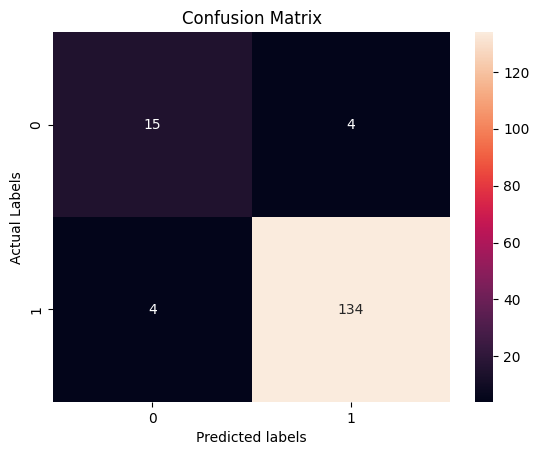

Accuracy = 0.9490445859872612
Precision = 0.9710144927536232
Recall = 0.9710144927536232
F1 Score = 0.9710144927536232


In [ ]:
accuracy_oxgbc_test,precision_oxgbc_test,recall_oxgbc_test,f1_oxgbc_test=disp_confusion_matrix(o_xgbc,x_test, y_test)

**Clustering Using KMeans**

In [ ]:
from sklearn.cluster import KMeans

cluster_range = range(1,16)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=5, max_iter=100)
    clusters.fit(x)

    cluster_errors.append(clusters.inertia_)

pd.DataFrame({'num_clusters':cluster_range, 'Error': cluster_errors})

,num_clusters,Error
0,1,46984.871945
1,2,19857.909850
2,3,13097.936668
3,4,10105.145090
4,5,7514.295242
5,6,6402.784145
6,7,5632.664149
7,8,5064.081612
8,9,4533.594754
9,10,4105.279474


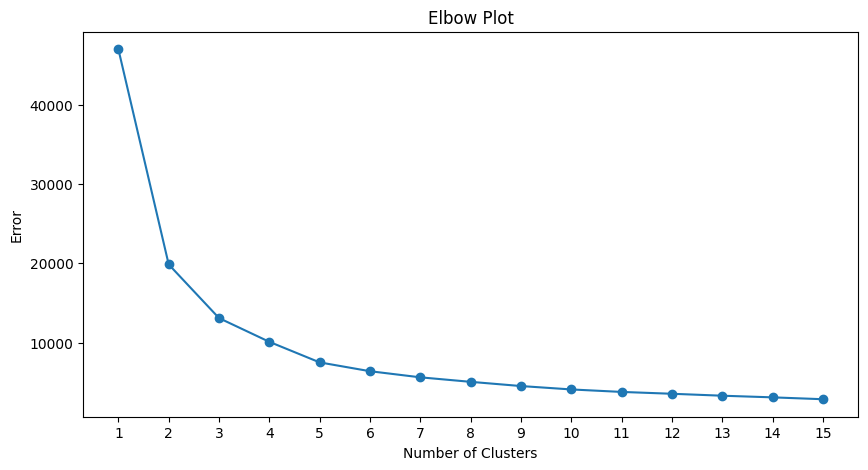

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(cluster_range, cluster_errors, marker = "o" )
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.xticks(cluster_range)
plt.show()

Form the above elbow plot we see that it shows 5. It seems that the optimal number of clusters for your dataset would be around 5.




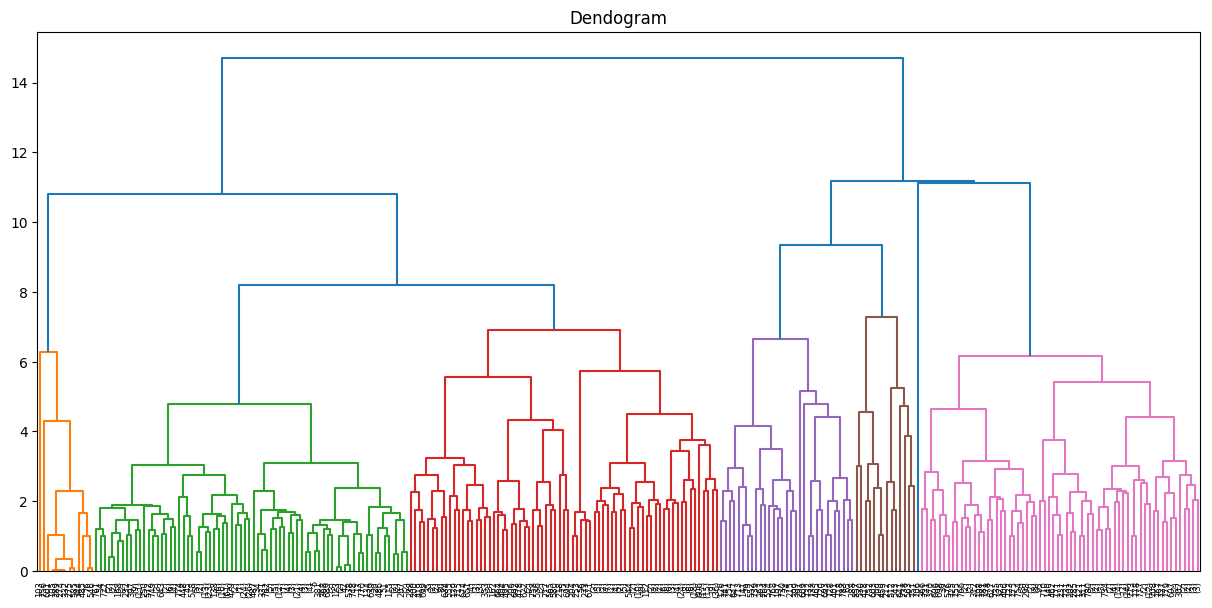

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15,7))
plt.title('Dendogram')

Z = linkage(x, method='average')
dendrogram(Z, leaf_rotation=90, p=9, truncate_mode='level', leaf_font_size=6, color_threshold=8)
plt.show()

The five clusters shown in the dendrogram,they are groupings of the data points in your dataset based on their similarity. Each cluster is formed by the data points that are more similar to each other than to those in other clusters, according to the distance or dissimilarity measure used in the hierarchical clustering algorithm.
 *   The exact nature of the data points within each
cluster would depend on the specific features and measurements you have used in your dataset for the Instagram fake users detection task.

**Tensorflow**

In [ ]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense(64,input_dim = 12, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                832       
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 150)               9750      
                                                                 
 dropout_25 (Dropout)        (None, 150)               0         
                                                                 
 dense_34 (Dense)            (None, 25)                3775      
                                                                 
 dropout_26 (Dropout)        (None, 25)                0         
                                                                 
 dense_35 (Dense)            (None, 2)                

 Importing the Sequential class from the Keras module within TensorFlow. The Sequential model is a linear stack of layers, commonly used for building neural network architectures.

*   Adding the initial layer to the model. It's a Dense layer with 64 units, expects an input dimension of 12 (assuming your input data has 12 features), and uses the ReLU activation function. The Dense layer represents a fully connected layer in the neural network.
*   Dropout layer with a dropout rate of 0.3. Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
*   adding another Dense layer with 150 units and ReLU activation.
*    Dropout layer is added with a dropout rate of 0.3.
*   adding yet another Dense layer with 25 units and ReLU activation.
*   Finally, the output layer is added. It's a Dense layer with 2 units, representing the number of output classes (assuming a binary classification task) and uses the softmax activation function, which is commonly used for multi-class classification problems as it outputs probabilities for each class.






In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(x_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
18/18 [==============================] - 2s 20ms/step - loss: 0.5675 - accuracy: 0.7841 - val_loss: 0.2879 - val_accuracy: 0.9206
Epoch 2/20
18/18 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.8779 - val_loss: 0.2042 - val_accuracy: 0.9206
Epoch 3/20
18/18 [==============================] - 0s 5ms/step - loss: 0.2826 - accuracy: 0.8903 - val_loss: 0.1691 - val_accuracy: 0.9524
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2388 - accuracy: 0.9062 - val_loss: 0.1502 - val_accuracy: 0.9524
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2182 - accuracy: 0.9027 - val_loss: 0.1446 - val_accuracy: 0.9365
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 0.1859 - accuracy: 0.9133 - val_loss: 0.1466 - val_accuracy: 0.9524
Epoch 7/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.9292 - val_loss: 0.1494 - val_accuracy: 0.9524
Epoch 8/20
18/18 [=

In [ ]:
y_model = model.predict(x_test)

5/5 [==============================] - 0s 4ms/step


In [ ]:
predicted_value = []
test = []
for i in y_model:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

In [ ]:
print(classification_report(test, predicted_value))

print("Train accuracy: ", model.evaluate(x_train,Y_train))
print("Test accuracy: ", model.evaluate(x_test,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22       157
           1       0.00      0.00      0.00         0

    accuracy                           0.12       157
   macro avg       0.50      0.06      0.11       157
weighted avg       1.00      0.12      0.22       157

20/20 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.9411


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy:  [0.1158754900097847, 0.941082775592804]
5/5 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.9363
Test accuracy:  [0.20549900829792023, 0.9363057613372803]


**Conclusion:**

Results for Test Data

In [ ]:
results_test = {'Model': ['Logistic Regression', 'Logistic Regression by SMOTE(Oversampling)',
              'Random Forest', 'Random Forest hyperparameter tuning with Grid search CV',
              'Random Forest by SMOTE(oversampling)', 'XG Boost', 'XG Boost tuning parameters',
              'XG Boost by SMOTE(oversampling)'],
        'Precision': [precision_lr_test, precision_smote_test,precision_rf_test,precision_urf_test,
                  precision_rfsmote_test,precision_xgbc_test,precision_uxgbc_test ,
                  precision_oxgbc_test],
        'Recall': [recall_lr_test,recall_smote_test,recall_rf_test,recall_urf_test,
               recall_rfsmote_test,recall_xgbc_test,recall_uxgbc_test,
               recall_oxgbc_test],
        'F1 Score': [f1_lr_test, f1_smote_test,f1_rf_test, f1_urf_test,
                 f1_rfsmote_test, f1_xgbc_test,f1_uxgbc_test,
                 f1_oxgbc_test],
        'Accuracy': [accuracy_lr_test, accuracy_smote_test, accuracy_rf_test, accuracy_urf_test,
                 accuracy_urf_test, accuracy_xgbc_test, accuracy_uxgbc_test,
                 accuracy_oxgbc_test]
    }

In [ ]:
results_df_test=pd.DataFrame(results_test)
results_df_test

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.937931,0.985507,0.961131,0.929936
1,Logistic Regression by SMOTE(Oversampling),0.992063,0.905797,0.946970,0.910828
2,Random Forest,0.923077,0.956522,0.939502,0.891720
3,Random Forest hyperparameter tuning with Grid ...,0.918919,0.985507,0.951049,0.910828
4,Random Forest by SMOTE(oversampling),0.960317,0.876812,0.916667,0.910828
5,XG Boost,0.929577,0.956522,0.942857,0.898089
6,XG Boost tuning parameters,0.924658,0.978261,0.950704,0.910828
7,XG Boost by SMOTE(oversampling),0.941606,0.934783,0.938182,0.891720
